<a href="https://colab.research.google.com/github/RudyMartin/dsai-2024/blob/main/MVPS/Camp-Rock-Paper-Scissors/gestures/baseline_gestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSAI Gestures Games AI Startup Project

In [ ]:
!pip install tensorflow opencv-python

In [ ]:
### Config Project Folder
import os
from google.colab import drive
import datetime

# Record the start time for performance evaluation
start_time = datetime.datetime.now()

# Mount Google Drive
drive.flush_and_unmount()
!rm -rf /tmp/*

drive.mount("/content/gdrive", force_remount=True)
root_dir = "/content/gdrive/My Drive/dsai-2024/MVPS"
proj_dir = os.path.join(root_dir, 'Camp-Rock-Paper-Scissors')
os.chdir('/content/gdrive/My Drive/dsai-2024/MVPS/Camp-Rock-Paper-Scissors')

## PLEASE REPOINT THIS NEXT LINE TO YOUR DATA
rps_dir = os.path.join(proj_dir, 'gestures') # this points to data folder
train_dir = os.path.join(rps_dir, 'train')
test_dir = os.path.join(rps_dir, 'test')
model_dir = os.path.join(rps_dir, 'model')
base_dir=rps_dir

# Create directories for train, test, and model activities
for dir in ['train', 'test', 'model']:
    os.makedirs(os.path.join(rps_dir, dir), exist_ok=True)

# Define and create directories for classes
gestures = ['up', 'down', 'left', 'right', 'neutral']
for gesture in gestures:
    os.makedirs(os.path.join(train_dir, gesture), exist_ok=True)
    os.makedirs(os.path.join(test_dir, gesture), exist_ok=True)

# Record the end time and calculate the elapsed time
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time}")

## Look at the current directory
%ls

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive
Elapsed time: 0:00:27.689644
colab_setup/  gestures/    model_tune/  rps/      rps_321/        rps_660/
data_prep/    model_init/  README.MD    rps_114/  rps_360_green/  rps_dir/


**Step 2: Set Up Data Collection**
We'll write a script to capture images from the webcam and save them into directories corresponding to the five directions: up, down, left, right, and neutral.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
import os
from datetime import datetime

# Directory for saving images
# see config above

# Create directories for each gesture
# see config above

def get_unique_filename(directory, gesture, extension='jpg'):
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    base_filename = f"{gesture}_{timestamp}"
    filename = f"{base_filename}.{extension}"
    full_path = os.path.join(directory, gesture, filename)
    counter = 1
    while os.path.exists(full_path):
        filename = f"{base_filename}_{counter}.{extension}"
        full_path = os.path.join(directory, gesture, filename)
        counter += 1
    return full_path


split_dir = train_dir ##. change

# Capture and save images
for gesture in gestures:
    print(f"Capturing images for {gesture}. Press the 'Capture' button in the displayed UI.")
    for _ in range(2):  # Adjust the range for more images
        unique_filename = get_unique_filename(split_dir, gesture)
        filename = take_photo(unique_filename)
        print(f"Saved {filename}")

Capturing images for up. Press the 'Capture' button in the displayed UI.


<IPython.core.display.Javascript object>

Saved /content/gdrive/My Drive/dsai-2024/MVPS/Camp-Rock-Paper-Scissors/gestures/train/up/up_20240808_024829.jpg


<IPython.core.display.Javascript object>

Saved /content/gdrive/My Drive/dsai-2024/MVPS/Camp-Rock-Paper-Scissors/gestures/train/up/up_20240808_024836.jpg
Capturing images for down. Press the 'Capture' button in the displayed UI.


<IPython.core.display.Javascript object>

Saved /content/gdrive/My Drive/dsai-2024/MVPS/Camp-Rock-Paper-Scissors/gestures/train/down/down_20240808_024839.jpg


<IPython.core.display.Javascript object>

Saved /content/gdrive/My Drive/dsai-2024/MVPS/Camp-Rock-Paper-Scissors/gestures/train/down/down_20240808_024842.jpg
Capturing images for left. Press the 'Capture' button in the displayed UI.


<IPython.core.display.Javascript object>

Saved /content/gdrive/My Drive/dsai-2024/MVPS/Camp-Rock-Paper-Scissors/gestures/train/left/left_20240808_024844.jpg


<IPython.core.display.Javascript object>

Saved /content/gdrive/My Drive/dsai-2024/MVPS/Camp-Rock-Paper-Scissors/gestures/train/left/left_20240808_024849.jpg
Capturing images for right. Press the 'Capture' button in the displayed UI.


<IPython.core.display.Javascript object>

Saved /content/gdrive/My Drive/dsai-2024/MVPS/Camp-Rock-Paper-Scissors/gestures/train/right/right_20240808_024851.jpg


<IPython.core.display.Javascript object>

Saved /content/gdrive/My Drive/dsai-2024/MVPS/Camp-Rock-Paper-Scissors/gestures/train/right/right_20240808_024854.jpg
Capturing images for neutral. Press the 'Capture' button in the displayed UI.


<IPython.core.display.Javascript object>

Saved /content/gdrive/My Drive/dsai-2024/MVPS/Camp-Rock-Paper-Scissors/gestures/train/neutral/neutral_20240808_024856.jpg


<IPython.core.display.Javascript object>

Saved /content/gdrive/My Drive/dsai-2024/MVPS/Camp-Rock-Paper-Scissors/gestures/train/neutral/neutral_20240808_024903.jpg


In [ ]:
##. Validate Data Exists
import glob

# Labels and corresponding directories
labels = ['up', 'down', 'left', 'right', 'neutral']
dirs = {
    'Train': train_dir,
    'Test': test_dir
}

# Nested loop to count images and print results
for dir_type, dir_path in dirs.items():
    print(f"{dir_type} directory: {dir_path}")
    for label in labels:
        num_images = len(glob.glob(f'{dir_path}/{label}/*.jpg'))
        print(f"Number of {dir_type.lower()} {label} images: {num_images}")

Train directory: /content/gdrive/My Drive/dsai-2024/MVPS/Camp-Rock-Paper-Scissors/gestures/train
Number of train up images: 4
Number of train down images: 4
Number of train left images: 4
Number of train right images: 4
Number of train neutral images: 4
Test directory: /content/gdrive/My Drive/dsai-2024/MVPS/Camp-Rock-Paper-Scissors/gestures/test
Number of test up images: 1
Number of test down images: 1
Number of test left images: 1
Number of test right images: 1
Number of test neutral images: 1


**Step 3: Prepare the Dataset**

After collecting enough images for each gesture, prepare the dataset for training.

The MobileNetV2 model expects input images to be 128x128 pixels with 3 color channels (RGB), but your training data has images of size 64x64 pixels. So set that in fthe function call.

In [ ]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Set seeds for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def load_data(base_dir, img_size=(128, 128)):
    X = []
    y = []
    gestures = ['up', 'down', 'left', 'right', 'neutral']
    label_map = {gesture: i for i, gesture in enumerate(gestures)}

    for gesture in gestures:
        gesture_dir = os.path.join(base_dir, gesture)
        for img_name in os.listdir(gesture_dir):
            img_path = os.path.join(gesture_dir, img_name)
            #img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read image in color mode
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(label_map[gesture])

    X = np.array(X, dtype='float32') / 255.0
    y = np.array(y, dtype='int')

    X = np.expand_dims(X, axis=-1)  # Add channel dimension
    y = to_categorical(y, num_classes=len(gestures))

    return train_test_split(X, y, test_size=0.2, random_state=seed)

# Load and split the data

X_train, X_test, y_train, y_test = load_data(train_dir)


**Step 4: Define, Train and Compile the Model**

Proceed with the model definition and training as usual. The seeds set earlier will ensure that the training process is reproducible.

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load MobileNetV2 with pre-trained weights, exclude top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base_model layers so they are not trained
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Unfreeze the base_model layers and fine-tune the entire model
for layer in base_model.layers:
    layer.trainable = True

# Re-compile the model with a lower learning rate
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and get the history object
h = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32)

# Save the model
model_name="mobilenetv2_head_gesture_model"
model.save(f'{model_dir}/{model_name}.keras')


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.2000 - loss: 1.8265 - val_accuracy: 0.6000 - val_loss: 1.3823
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step - accuracy: 0.5000 - loss: 1.3934 - val_accuracy: 0.6000 - val_loss: 1.1492
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step - accuracy: 0.6500 - loss: 1.0984 - val_accuracy: 0.6000 - val_loss: 0.9628
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step - accuracy: 0.8000 - loss: 0.8230 - val_accuracy: 0.8000 - val_loss: 0.8743
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step - accuracy: 0.9000 - loss: 0.6446 - val_accuracy: 0.8000 - val_loss: 0.8319
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9500 - loss: 0.5265 - val_accuracy: 0.8000 - val_loss: 0.7717
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 1.0000 - loss: 0.4270 - val_accuracy: 0.8000 - val_loss: 0.6562
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step - accuracy: 1.0000 - loss: 0.3232 - val_accuracy: 1.0000 - val_loss: 

PLEASE FIX THIS

**STEP 5: Evaluate the Model**

Found 5 images belonging to 5 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


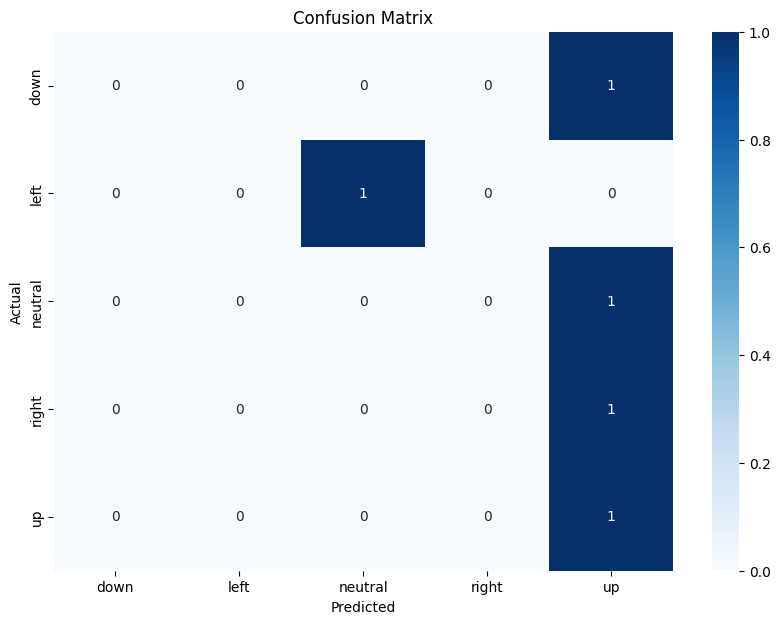

Classification Report:
              precision    recall  f1-score   support

        down       0.00      0.00      0.00         1
        left       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         1
       right       0.00      0.00      0.00         1
          up       0.25      1.00      0.40         1

    accuracy                           0.20         5
   macro avg       0.05      0.20      0.08         5
weighted avg       0.05      0.20      0.08         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Define the evaluation function
def evaluate_model(generator, model):
    all_labels = []
    all_preds = []
    for images, labels in generator:
        preds = model.predict(images)
        all_preds.extend(preds)
        all_labels.extend(labels)
        if len(all_labels) >= len(generator.labels):  # Prevent infinite loop
            break
    y_pred = np.argmax(np.array(all_preds), axis=1)
    y_true = np.argmax(np.array(all_labels), axis=1)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=generator.class_indices.keys(), yticklabels=generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=generator.class_indices.keys()))

# Load your model (replace with your actual model path)
model_name="mobilenetv2_head_gesture_model"
model1 = load_model(f'{model_dir}/{model_name}.keras')

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    f'{test_dir}',  # Adjust the path to your test data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure shuffle is set to False for proper evaluation
)

# Evaluate the model
evaluate_model(test_generator, model1)


In [ ]:
## 7. Evaluate Model

# helper functions
def show_scores1(model, h, X_train, Y_train, X_test, Y_test):
    loss, acc = model.evaluate(X_train, Y_train, verbose=0)
    print ("Training: accuracy   = %.6f loss = %.6f" % (acc, loss))
    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print ("Validation: accuracy = %.6f loss = %.6f" % (acc, loss))
    if 'val_acc' in h.history:
        print ("Over fitting score   = %.6f" % over_fitting_score(h))
        print ("Under fitting score  = %.6f" % under_fitting_score(h))
    print ("Params count:", model.count_params())
    print ("stop epoch =", max(h.epoch))
    print ("nb_epoch =", h.params['epochs'])
    #print ("batch_size =", h.params['batch_size'])
    #print ("nb_sample =", h.params['samples'])
    view_acc1(h)
    id = model.name[-1]
    plt.savefig(model.name + '_acc_graph.png')
    plt.show()
    view_loss(h)
    plt.savefig(model.name + '_loss_graph.png')
    plt.show()

def view_acc1(h):
    # Accuracy history graph
    plt.plot(h.history['accuracy'])
    if 'val_accuracy' in h.history:
        plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    leg = plt.legend(['train', 'validation'], loc='best')
    plt.setp(leg.get_lines(), linewidth=3.0)

def view_loss(h):
    # Loss history graph
    plt.plot(h.history['loss'])
    if 'val_loss' in h.history:
        plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    leg = plt.legend(['train', 'validation'], loc='best')
    plt.setp(leg.get_lines(), linewidth=3.0)

 ## print both model accuracy and model loss by epoch
show_scores1(model1, h, X_train, Y_train, X_test, Y_test)

NameError: name 'h' is not defined

In [ ]:
## Unmount your drive when finished
drive.flush_and_unmount()

In [ ]:
## CONFUSION MATRIX** :  Contains True versus Predicted Vakues

# Define classes
class_name = {
    0: 'scissor',
    1: 'rock',
    2: 'paper'
}

# Make predictions
predict_x = model1.predict(X_test)
y_pred = np.argmax(predict_x, axis=1)

# Convert numerical labels to class names
y_test_labels = [class_name[int(y)] for y in y_test]
y_pred_labels = [class_name[int(y)] for y in y_pred]

true_preds = [(x, y, p) for (x, y, p) in zip(X_test, y_test_labels, y_pred_labels) if y == p]
false_preds = [(x, y, p) for (x, y, p) in zip(X_test, y_test_labels, y_pred_labels) if y != p]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
classes = np.array(list(class_name.values()))

# Initialize the metrics dictionary
metrics = {
    'Class': [],
    'TP': [],
    'FN': [],
    'FP': [],
    'TN': [],
    'Recall': [],
    'Precision': [],
    'Accuracy': [],
    'F1 Score': [],
    'Specificity': [],
    'MCC': [],
    'Jaccard Index': []
}

# Calculate metrics for each class
for i, class_label in enumerate(classes):
    TP = conf_matrix[i, i]
    FN = conf_matrix[i, :].sum() - TP
    FP = conf_matrix[:, i].sum() - TP
    TN = conf_matrix.sum() - (TP + FN + FP)

    recall = TP / (TP + FN) if TP + FN != 0 else 0
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN) if TP + TN + FP + FN != 0 else 0
    f1 = f1_score(y_test_labels, y_pred_labels, labels=[class_label], average=None)[0]
    specificity = TN / (TN + FP) if TN + FP != 0 else 0
    mcc = matthews_corrcoef(y_test_labels, y_pred_labels)
    jaccard = jaccard_score(y_test_labels, y_pred_labels, labels=[class_label], average=None)[0]

    metrics['Class'].append(class_label)
    metrics['TP'].append(TP)
    metrics['FN'].append(FN)
    metrics['FP'].append(FP)
    metrics['TN'].append(TN)
    metrics['Recall'].append(recall)
    metrics['Precision'].append(precision)
    metrics['Accuracy'].append(accuracy)
    metrics['F1 Score'].append(f1)
    metrics['Specificity'].append(specificity)
    metrics['MCC'].append(mcc)
    metrics['Jaccard Index'].append(jaccard)

# Convert metrics dictionary to DataFrame
df_metrics = pd.DataFrame(metrics)

# Show the DataFrame with all metrics
print(df_metrics)

# Save the DataFrame to a CSV file
df_metrics.to_csv(f"df_metrics_{model_name}_20240610.csv", index=False)

ValueError: as_list() is not defined on an unknown TensorShape.

In [ ]:
## Unmount your drive when finished
drive.flush_and_unmount()